# CSE 5522 Lab1 Part1
# Name: Jian Gao

In [228]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


miR_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
miR_df=pd.read_csv(miR_URL)
# remove row names from the frist column, rows=samples, cols=miR features
miR = np.array(miR_df)[:,1:]
miR_df = pd.DataFrame(miR)

mRNA_well_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mRNA_well_df=pd.read_csv(mRNA_well_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_well = np.transpose(np.array(mRNA_well_df)[:,1:8896])
mRNA_well_gene = np.transpose(np.array(mRNA_well_df)[:,0])
                                                
mRNA_well_df = pd.DataFrame(mRNA_well)

mRNA_poor_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mRNA_poor_df=pd.read_csv(mRNA_poor_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_poor = np.transpose(np.array(mRNA_poor_df)[:,1:8896])
mRNA_poor_gene = np.transpose(np.array(mRNA_poor_df)[:,0])
mRNA_poor_df = pd.DataFrame(mRNA_poor)

# Carry on from this point on your own, using the Boston Housing problem as a guide.


In [229]:
# Define linear regression function, which uses skleanr linearRegression model.
def lin_regression(miR_traindata,target):
    model = LinearRegression()
    model.fit(miR_traindata,target)
    test_predict = model.predict(miR_traindata)
    rmse = (np.sqrt(mean_squared_error(target,test_predict)))
    r2 = r2_score(target,test_predict)
    return [rmse,r2]

In [230]:
# Initial arrays to store results, and do the linear regression
r2_well_train = []
r2_well_test = []
rmse_well_train = []
rmse_well_test = []
r2_poor_train = []
r2_poor_test = []
rmse_poor_train = []
rmse_poor_test = []
for times in range(10):
    randomNum = random.randint(1,21)
    miR_train, miR_test = train_test_split(miR_df, test_size = 0.2,random_state = randomNum)
    mRNA_well_train, mRNA_well_test = train_test_split(mRNA_well_df, test_size = 0.2,random_state = randomNum)
    mRNA_poor_train, mRNA_poor_test = train_test_split(mRNA_poor_df, test_size = 0.2,random_state =randomNum)
    for x in range(len(mRNA_well_df.columns)):
        train_target = mRNA_well_train.iloc[:,x]
        test_target = mRNA_well_test.iloc[:,x]
        result = lin_regression(miR_train,train_target)  
        r2_well_train.append(result[1])
        rmse_well_train.append(result[0])
        result = lin_regression(miR_test,test_target)  
        r2_well_test.append(result[1])
        rmse_well_test.append(result[0])
    
    for x in range(len(mRNA_poor_df.columns)):
        train_target = mRNA_poor_train.iloc[:,x]
        test_target = mRNA_poor_test.iloc[:,x]
        result = lin_regression(miR_train,train_target)  
        r2_poor_train.append(result[1])
        rmse_poor_train.append(result[0])
        result = lin_regression(miR_test,test_target)  
        r2_poor_test.append(result[1])
        rmse_poor_test.append(result[0])


In [231]:
# Reshape results of r2 and rmse for both train and test dataset for both well and poor expressed gene types file for more convenient expression and calculation.
r2_well_train = np.array(r2_well_train)
rmse_well_train = np.array(rmse_well_train)
r2_poor_train = np.array(r2_poor_train)
rmse_poor_train = np.array(rmse_poor_train)
r2_well_train = r2_well_train.reshape((10,35))
rmse_well_train = rmse_well_train.reshape((10,35))
r2_poor_train = r2_poor_train.reshape((10,20))
rmse_poor_train = rmse_poor_train.reshape((10,20))

r2_well_test = np.array(r2_well_test)
rmse_well_test= np.array(rmse_well_test)
r2_poor_test = np.array(r2_poor_test)
rmse_poor_test= np.array(rmse_poor_test)
r2_well_test = r2_well_test.reshape((10,35))
rmse_well_test = rmse_well_test.reshape((10,35))
r2_poor_test = r2_poor_test.reshape((10,20))
rmse_poor_test = rmse_poor_test.reshape((10,20))


In [232]:
# Calculate mean and standard deviation for r2 and rmse for both train and test dataset, and for both well and poor expressed gene types file.
r2_well_train_mean = np.mean(r2_well_train, axis = 0)
rmse_well_train_mean = np.mean(rmse_well_train, axis = 0)
r2_poor_train_mean = np.mean(r2_poor_train, axis = 0)
rmse_poor_train_mean = np.mean(rmse_poor_train, axis = 0)
r2_well_train_std = np.std(r2_well_train, axis = 0)
rmse_well_train_std = np.std(rmse_well_train, axis = 0)
r2_poor_train_std = np.std(r2_poor_train, axis = 0)
rmse_poor_train_std = np.std(rmse_poor_train, axis = 0)

r2_well_test_mean = np.mean(r2_well_test, axis = 0)
rmse_well_test_mean = np.mean(rmse_well_test, axis = 0)
r2_poor_test_mean = np.mean(r2_poor_test, axis = 0)
rmse_poor_test_mean = np.mean(rmse_poor_test, axis = 0)
r2_well_test_std = np.std(r2_well_test, axis = 0)
rmse_well_test_std = np.std(rmse_well_test, axis = 0)
r2_poor_test_std = np.std(r2_poor_test, axis = 0)
rmse_poor_test_std = np.std(rmse_poor_test, axis = 0)



### This is the results  for  each of the mRNA predictors in the mRNA expressions that are <strong><font color = "red">well explained </font></strong>for those same samples

In [233]:
well_result = pd.DataFrame({"well_gene" : mRNA_well_gene, "r2_train_mean":r2_well_train_mean, "r2_test_mean":r2_well_test_mean, "r2_train_std":r2_well_train_std, "r2_test_std":r2_well_test_std, "rmse_train_mean":rmse_well_train_mean, "rmse_test_mean":rmse_well_test_mean, "rmse_train_std":rmse_well_train_std, "rmse_test_std":rmse_well_test_std})
well_result

,well_gene,r2_train_mean,r2_test_mean,r2_train_std,r2_test_std,rmse_train_mean,rmse_test_mean,rmse_train_std,rmse_test_std
0,SNORD88B,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,GRHL2,0.891289,0.890586,0.000900,0.003291,1.048036,1.050900,0.004522,0.016348
2,C1orf172,0.879056,0.874071,0.001330,0.005221,0.752827,0.762978,0.003888,0.014688
3,RAB25,0.873525,0.870736,0.000692,0.002595,1.214801,1.224799,0.003192,0.011395
4,ANKS4B,0.864322,0.869065,0.001816,0.006678,0.830172,0.811213,0.004172,0.016603
5,HNF4A,0.863367,0.867156,0.001687,0.006727,1.183890,1.163977,0.005608,0.021944
6,AP1M2,0.850011,0.845264,0.001403,0.006157,1.173244,1.185524,0.006070,0.025243
7,PKP3,0.844629,0.842851,0.001451,0.005457,1.266288,1.272460,0.005908,0.021741
8,STMN4,0.839170,0.834013,0.002000,0.008598,0.781156,0.774661,0.003149,0.011760
9,ESRP1,0.838150,0.838276,0.001589,0.006511,1.267351,1.270121,0.004440,0.019233


### This is the results  for  each of the mRNA predictors in the mRNA expressions that are <font color = "red">poor explained </font>for those same samples

In [234]:
poor_result = pd.DataFrame({"poor_gene" : mRNA_poor_gene, "r2_train_mean":r2_poor_train_mean, "r2_test_mean":r2_poor_test_mean, "r2_train_std":r2_poor_train_std, "r2_test_std":r2_poor_test_std, "rmse_train_mean":rmse_poor_train_mean, "rmse_test_mean":rmse_poor_test_mean, "rmse_train_std":rmse_poor_train_std, "rmse_test_std":rmse_poor_test_std})
poor_result

,poor_gene,r2_train_mean,r2_test_mean,r2_train_std,r2_test_std,rmse_train_mean,rmse_test_mean,rmse_train_std,rmse_test_std
0,NOBOX,0.049349,0.060428,0.002878,0.013761,0.345895,0.358326,0.009528,0.034756
1,SCGB1D4,0.051397,0.053343,0.002313,0.009083,0.434886,0.416987,0.014875,0.065401
2,RPL9,0.052307,0.051842,0.002604,0.009675,1.757984,1.751851,0.002557,0.009052
3,SPATA8,0.050954,0.056916,0.002958,0.012522,0.226782,0.227182,0.003096,0.012359
4,C2orf78,0.049846,0.073507,0.007165,0.036764,0.170071,0.158267,0.008540,0.034763
5,FAM138B,0.051959,0.061670,0.004813,0.016008,0.069456,0.067915,0.001800,0.007502
6,LCE3C,0.051808,0.047568,0.001640,0.006870,0.296824,0.295856,0.008679,0.036101
7,POU5F2,0.049970,0.059495,0.002304,0.010059,0.128580,0.125203,0.002759,0.011281
8,OR2D3,0.051583,0.051482,0.003469,0.014198,0.044091,0.041697,0.001658,0.006514
9,PABPC1P2,0.050924,0.056339,0.001840,0.007421,0.129010,0.128441,0.003415,0.012996


### This is the histograms for the <font color = "red">training data</font> for each of the mRNA predictors in the mRNA expressions that are both well and poor explained for those same samples

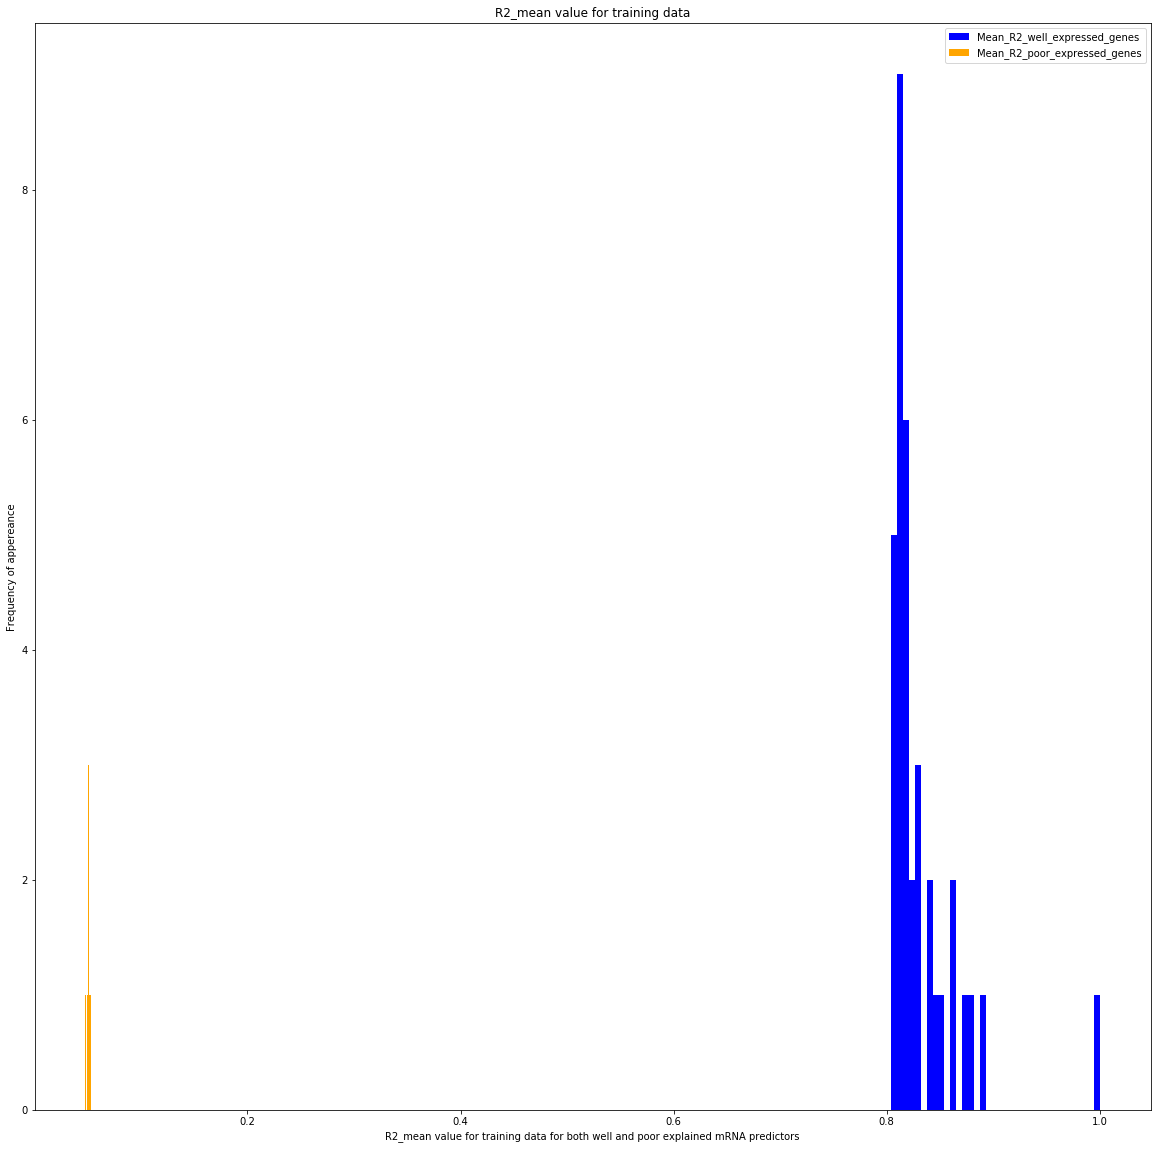

In [235]:
u_well_train = r2_well_train_mean
std_well_train = r2_well_train_std
u_poor_train = r2_poor_train_mean
std_poor_train = r2_poor_train_std
plt.subplots(figsize=(20,20))
plt.hist(u_well_train, bins = 35, color = "blue", label = "Mean_R2_well_expressed_genes")
plt.hist(u_poor_train, bins = 20, color = "orange", label = "Mean_R2_poor_expressed_genes")
plt.xlabel("R2_mean value for training data for both well and poor explained mRNA predictors")
plt.ylabel("Frequency of appereance")
plt.title("R2_mean value for training data")
plt.legend(loc='upper right')
plt.show()

### This is the histograms for the <font color = "red">test data</font> for each of the mRNA predictors in the mRNA expressions that are both well and poor explained for those same samples

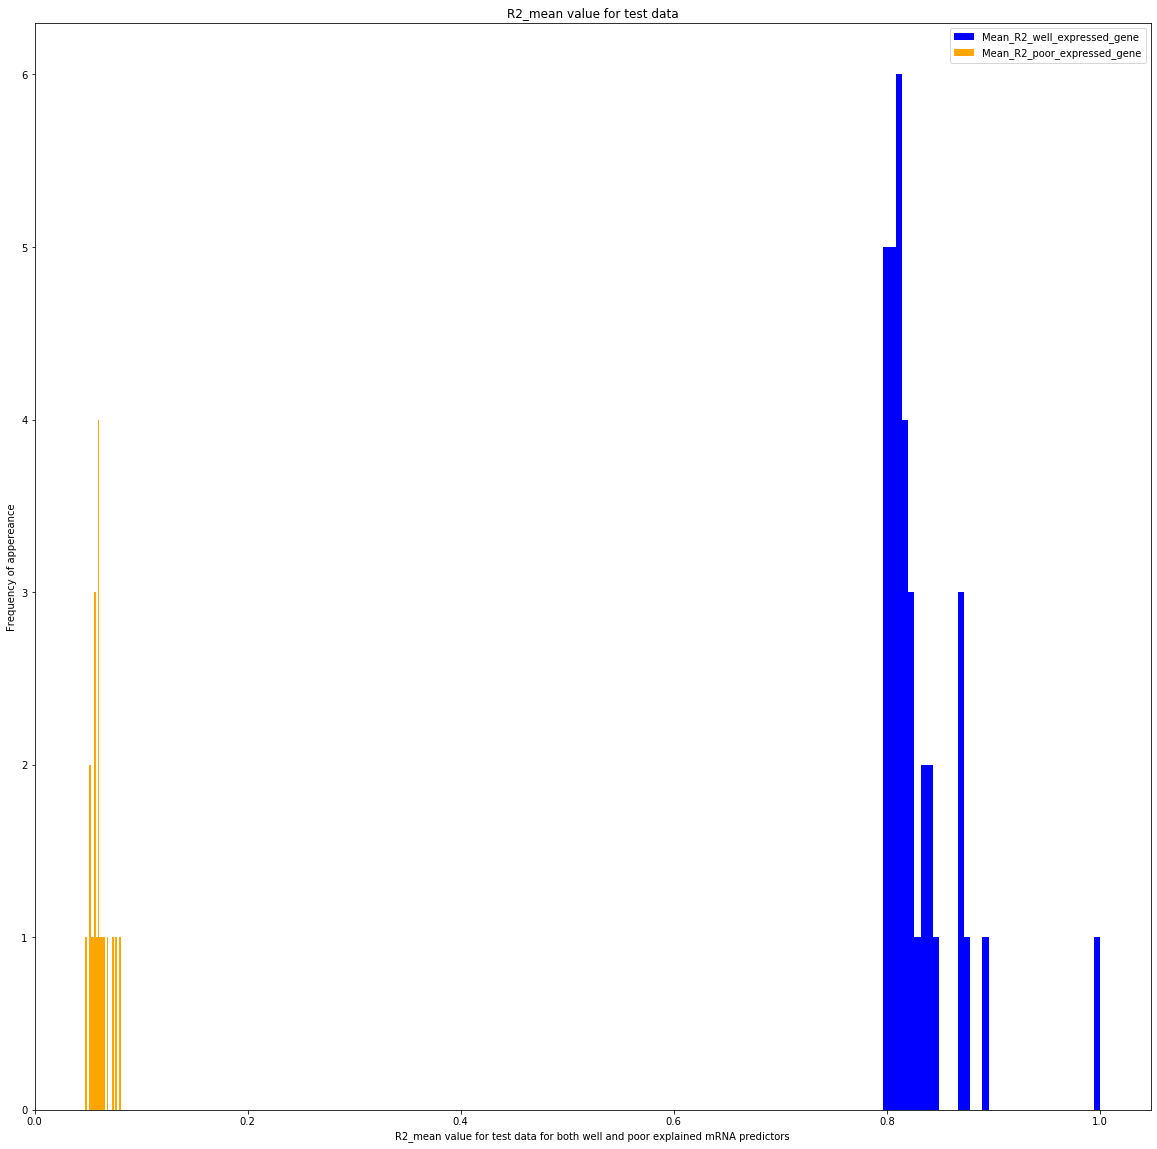

In [236]:
u_well_test = r2_well_test_mean
std_well_test = r2_well_test_std
u_poor_test = r2_poor_test_mean
std_poor_test = r2_poor_test_std
plt.subplots(figsize=(20,20))
plt.hist(u_well_test, bins = 35, color = "blue", label = "Mean_R2_well_expressed_gene")
plt.hist(u_poor_test, bins = 20, color = "orange", label = "Mean_R2_poor_expressed_gene")
plt.xlabel("R2_mean value for test data for both well and poor explained mRNA predictors")
plt.ylabel("Frequency of appereance")
plt.title("R2_mean value for test data")
plt.legend(loc='upper right')
plt.show()

## <font color = "red">Answer to questions:</font>  "Describe the differences you see across the well and poorly expressed gene sets."

         For well expressed gene sets, the mean of r2 values are higher than that of poor expressed gene sets, which means well expressed gene sets fit better to our linear regression model. It is for sure that its plot is higher since it has 15 more genes in the well expressed gene sets. So, it is easier for on value's frequency get highter. Thus, for well expressed genes's histogram, its highest frequency value is higher than that of poor expressed genes.

## Add Categorical tissue type as dummy variables in features

In [237]:
tissue_URL = "https://raw.githubusercontent.com/efosler/cse5522data/master/cancerType-x-Categorical.csv"
tissue_df = pd.read_csv(tissue_URL)
tissue_df.shape
tissue = np.array(tissue_df)[:,1:]
tissue = pd.get_dummies(pd.DataFrame(tissue), drop_first = True)
miR_df = pd.concat([miR_df, tissue], axis = 1)

In [238]:
# print (type(miR_df))
r2_well_train = []
r2_well_test = []
rmse_well_train = []
rmse_well_test = []
r2_poor_train = []
r2_poor_test = []
rmse_poor_train = []
rmse_poor_test = []
for times in range(10):
    randomNum = random.randint(1,50)
    miR_train, miR_test = train_test_split(miR_df, test_size = 0.2,random_state = randomNum)
    mRNA_well_train, mRNA_well_test = train_test_split(mRNA_well_df, test_size = 0.2,random_state = randomNum)
    mRNA_poor_train, mRNA_poor_test = train_test_split(mRNA_poor_df, test_size = 0.2,random_state =randomNum)
    for x in range(len(mRNA_well_df.columns)):
        train_target = mRNA_well_train.iloc[:,x]
        test_target = mRNA_well_test.iloc[:,x]
        result = lin_regression(miR_train,train_target)  
        r2_well_train.append(result[1])
        rmse_well_train.append(result[0])
        result = lin_regression(miR_test,test_target)  
        r2_well_test.append(result[1])
        rmse_well_test.append(result[0])
    
    for x in range(len(mRNA_poor_df.columns)):
        train_target = mRNA_poor_train.iloc[:,x]
        test_target = mRNA_poor_test.iloc[:,x]
        result = lin_regression(miR_train,train_target)  
        r2_poor_train.append(result[1])
        rmse_poor_train.append(result[0])
        result = lin_regression(miR_test,test_target)  
        r2_poor_test.append(result[1])
        rmse_poor_test.append(result[0])


In [239]:
r2_well_train = np.array(r2_well_train)
rmse_well_train = np.array(rmse_well_train)
r2_poor_train = np.array(r2_poor_train)
rmse_poor_train = np.array(rmse_poor_train)
r2_well_train = r2_well_train.reshape((10,35))
rmse_well_train = rmse_well_train.reshape((10,35))
r2_poor_train = r2_poor_train.reshape((10,20))
rmse_poor_train = rmse_poor_train.reshape((10,20))

r2_well_test = np.array(r2_well_test)
rmse_well_test= np.array(rmse_well_test)
r2_poor_test = np.array(r2_poor_test)
rmse_poor_test= np.array(rmse_poor_test)
r2_well_test = r2_well_test.reshape((10,35))
rmse_well_test = rmse_well_test.reshape((10,35))
r2_poor_test = r2_poor_test.reshape((10,20))
rmse_poor_test = rmse_poor_test.reshape((10,20))


In [240]:
r2_well_train_mean = np.mean(r2_well_train, axis = 0)
rmse_well_train_mean = np.mean(rmse_well_train, axis = 0)
r2_poor_train_mean = np.mean(r2_poor_train, axis = 0)
rmse_poor_train_mean = np.mean(rmse_poor_train, axis = 0)
r2_well_train_std = np.std(r2_well_train, axis = 0)
rmse_well_train_std = np.std(rmse_well_train, axis = 0)
r2_poor_train_std = np.std(r2_poor_train, axis = 0)
rmse_poor_train_std = np.std(rmse_poor_train, axis = 0)

r2_well_test_mean = np.mean(r2_well_test, axis = 0)
rmse_well_test_mean = np.mean(rmse_well_test, axis = 0)
r2_poor_test_mean = np.mean(r2_poor_test, axis = 0)
rmse_poor_test_mean = np.mean(rmse_poor_test, axis = 0)
r2_well_test_std = np.std(r2_well_test, axis = 0)
rmse_well_test_std = np.std(rmse_well_test, axis = 0)
r2_poor_test_std = np.std(r2_poor_test, axis = 0)
rmse_poor_test_std = np.std(rmse_poor_test, axis = 0)



### This is the results  for  each of the mRNA predictors in the mRNA expressions that are <font color = "red">well explained </font>for those same samples after adding tissue types

In [241]:
well_result = pd.DataFrame({"well_gene" : mRNA_well_gene, "r2_train_mean":r2_well_train_mean, "r2_test_mean":r2_well_test_mean, "r2_train_std":r2_well_train_std, "r2_test_std":r2_well_test_std, "rmse_train_mean":rmse_well_train_mean, "rmse_test_mean":rmse_well_test_mean, "rmse_train_std":rmse_well_train_std, "rmse_test_std":rmse_well_test_std})
well_result

,well_gene,r2_train_mean,r2_test_mean,r2_train_std,r2_test_std,rmse_train_mean,rmse_test_mean,rmse_train_std,rmse_test_std
0,SNORD88B,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,GRHL2,0.921464,0.925371,0.000897,0.003751,0.890265,0.869718,0.004396,0.019177
2,C1orf172,0.900567,0.902602,0.002096,0.008448,0.681229,0.675664,0.006261,0.025335
3,RAB25,0.895239,0.899577,0.001495,0.005462,1.104458,1.083577,0.007068,0.025993
4,ANKS4B,0.898908,0.900731,0.001918,0.007059,0.717400,0.702666,0.005457,0.020801
5,HNF4A,0.923103,0.924628,0.001513,0.005956,0.888657,0.874209,0.007961,0.030987
6,AP1M2,0.883631,0.888469,0.002460,0.010066,1.031331,1.013401,0.009865,0.041398
7,PKP3,0.876273,0.877504,0.001654,0.006331,1.129054,1.126659,0.005379,0.020164
8,STMN4,0.913855,0.919077,0.002157,0.007950,0.567701,0.555838,0.005130,0.020164
9,ESRP1,0.894044,0.897132,0.001203,0.004364,1.025578,1.012626,0.004962,0.018218


### This is the results  for  each of the mRNA predictors in the mRNA expressions that are <font color="red">poor explained </font>for those same samples after adding tissue types

In [242]:
poor_result = pd.DataFrame({"poor_gene" : mRNA_poor_gene, "r2_train_mean":r2_poor_train_mean, "r2_test_mean":r2_poor_test_mean, "r2_train_std":r2_poor_train_std, "r2_test_std":r2_poor_test_std, "rmse_train_mean":rmse_poor_train_mean, "rmse_test_mean":rmse_poor_test_mean, "rmse_train_std":rmse_poor_train_std, "rmse_test_std":rmse_poor_test_std})
poor_result

,poor_gene,r2_train_mean,r2_test_mean,r2_train_std,r2_test_std,rmse_train_mean,rmse_test_mean,rmse_train_std,rmse_test_std
0,NOBOX,0.097734,0.103614,0.005448,0.023543,0.340686,0.334311,0.010428,0.040776
1,SCGB1D4,0.191290,0.230727,0.005673,0.024430,0.395087,0.400478,0.016540,0.060037
2,RPL9,0.119098,0.137901,0.003239,0.012597,1.695069,1.669991,0.004046,0.015703
3,SPATA8,0.097241,0.111488,0.005034,0.024862,0.216603,0.235589,0.008296,0.029159
4,C2orf78,0.085635,0.137828,0.007044,0.049002,0.169096,0.144900,0.005694,0.026704
5,FAM138B,0.085372,0.112943,0.005184,0.017454,0.068534,0.064736,0.001920,0.007794
6,LCE3C,0.146645,0.145048,0.011773,0.050298,0.281081,0.281503,0.007107,0.025581
7,POU5F2,0.163606,0.176766,0.003477,0.012823,0.120939,0.116159,0.002012,0.008815
8,OR2D3,0.141356,0.165527,0.004904,0.030980,0.042430,0.037212,0.001269,0.005737
9,PABPC1P2,0.074025,0.099294,0.002059,0.009085,0.127472,0.125754,0.002251,0.008823


### This is the histograms for the <font color ="red">trainning data </font>for each of the mRNA predictors in the mRNA expressions that are both well and poor explained for those same samples after adding tissue types

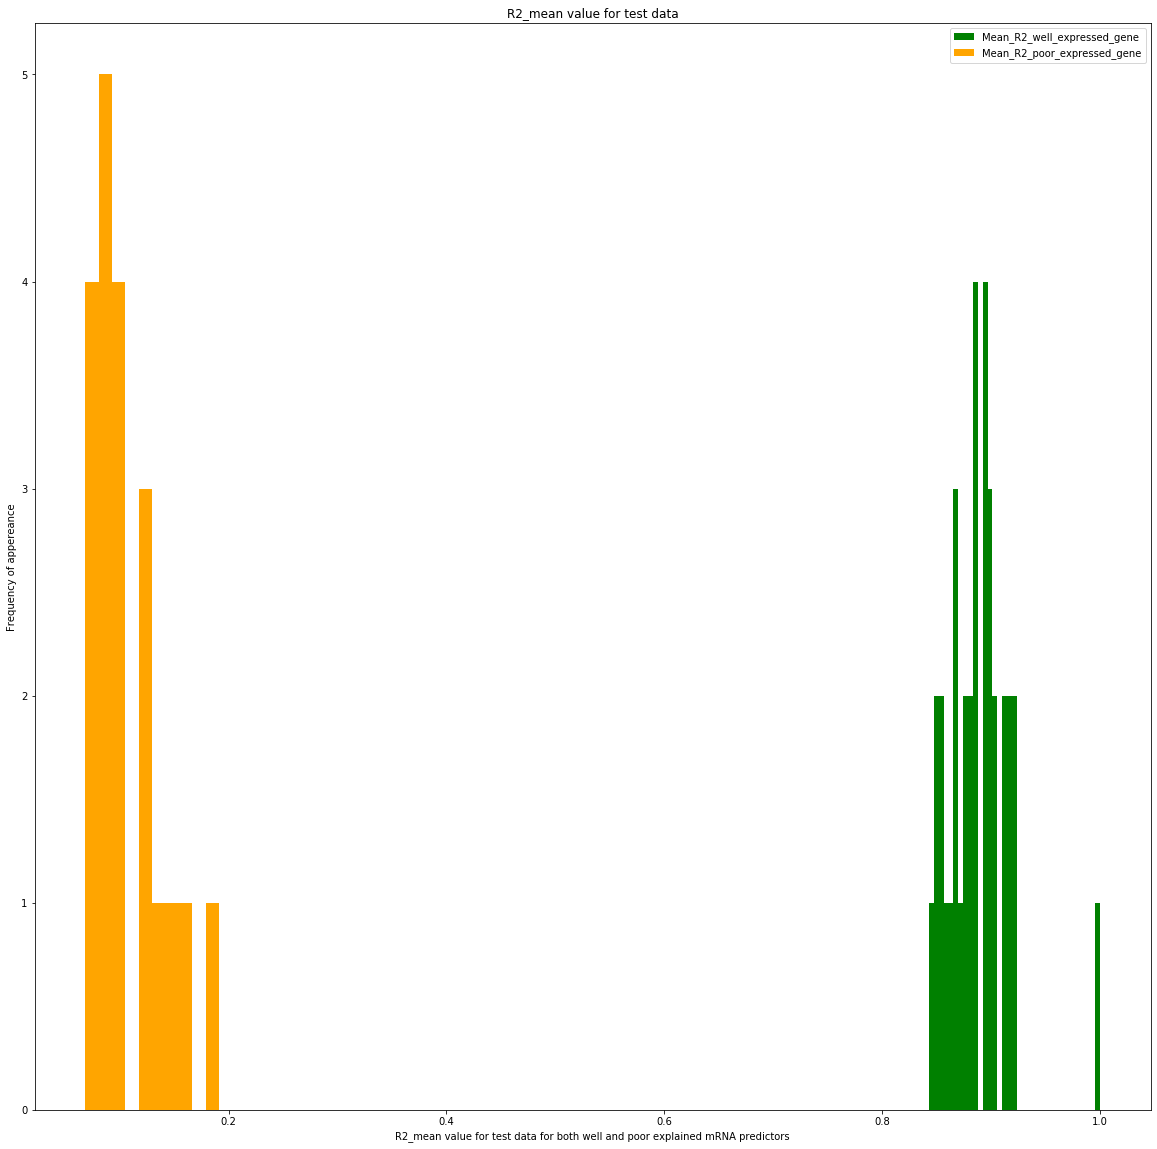

In [243]:
u_well_train = r2_well_train_mean
std_well_train = r2_well_train_std
u_poor_train = r2_poor_train_mean
std_poor_train = r2_poor_train_std
plt.subplots(figsize=(20,20))
plt.hist(r2_well_train_mean, bins = 35, color = "green", label = "Mean_R2_well_expressed_gene")
plt.hist(r2_poor_train_mean, bins = 10, color = "orange", label = "Mean_R2_poor_expressed_gene")
plt.xlabel("R2_mean value for test data for both well and poor explained mRNA predictors")
plt.ylabel("Frequency of appereance")
plt.title("R2_mean value for test data")
plt.legend(loc='upper right')
plt.show()

### This is the histograms for the<font color="red"> test data </font>for each of the mRNA predictors in the mRNA expressions that are both well and poor explained for those same samples after adding tissue types

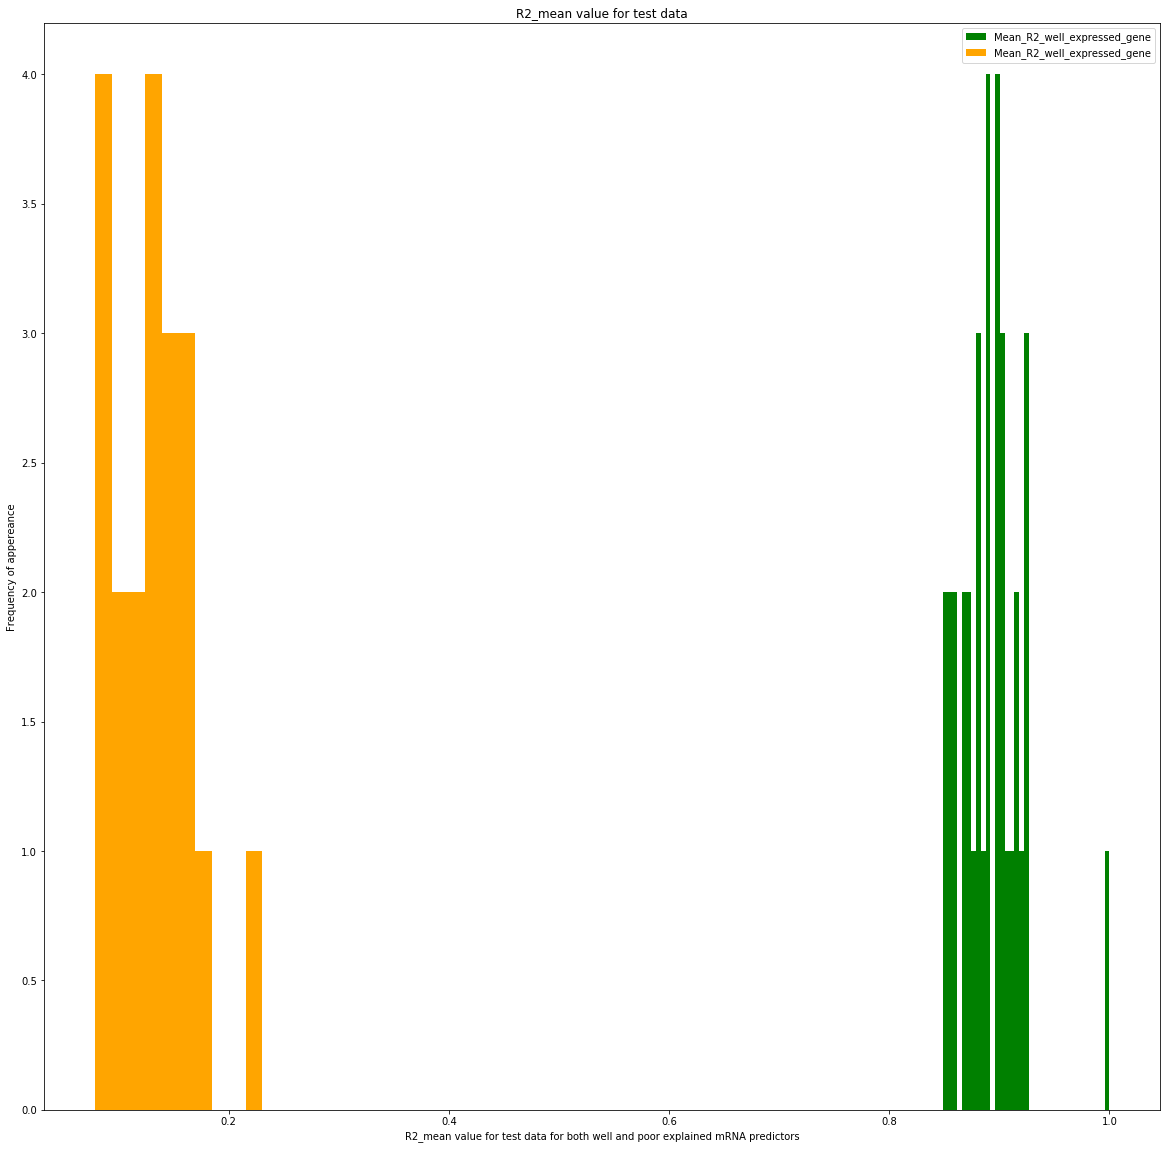

In [244]:
u_well_test = r2_well_test_mean
std_well_test = r2_well_test_std
u_poor_test = r2_poor_test_mean
std_poor_test = r2_poor_test_std
plt.subplots(figsize=(20,20))
plt.hist(u_well_test, bins = 35, color = "green", label = "Mean_R2_well_expressed_gene")
plt.hist(u_poor_test, bins = 10, color = "orange", label = "Mean_R2_well_expressed_gene")
plt.xlabel("R2_mean value for test data for both well and poor explained mRNA predictors")
plt.ylabel("Frequency of appereance")
plt.title("R2_mean value for test data")
plt.legend(loc='upper right')
plt.show()

## <font color = "red">Answer to questions:</font> "Report any change in prediction performance of your model and explain it. "

     After adding dummy variables (tissue types), r2_mean values become larger than before (Histogram plots shift to right). I think the reason is that it helps us to group different kind of features to enlarge numbers of samples, which means increase the freedom of making errors. Thus, it helps increase most of mean values of R2. And higher R2 values means better fit of our linear regression model. As a result, adding categorical data does help predict and train the model. 